In [ ]:
#IMPORTAÇÃO DAS BIBLIOTECAS

import pandas as pd              # Manipulação e análise de dados
import numpy as np               # Operações numéricas
import seaborn as sns            # Visualizações estatísticas
import matplotlib.pyplot as plt  # Criação de gráficos
import matplotlib                # Configurações gerais do Matplotlib


# CONFIGURAÇÕES DE VISUALIZAÇÃO

# Define o estilo dos gráficos
plt.style.use('ggplot')

# Define o tamanho padrão das figuras
matplotlib.rcParams['figure.figsize'] = (12, 8)

# Permite que gráficos apareçam diretamente no notebook
%matplotlib inline


In [3]:
df = pd.read_csv('movies.csv')# Verifica o formato da base (linhas e colunas)
print(f'Total de linhas e colunas: {df.shape}')

# Verifica tipos de dados
df.info()

# Verifica valores ausentes
df.isnull().sum()


Total de linhas e colunas: (7668, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
# Calcula a porcentagem de valores ausentes de forma vetorizada
valores_ausentes = df.isnull().mean() * 100

# Ordena do maior para o menor
valores_ausentes = valores_ausentes.sort_values(ascending=False)

print(valores_ausentes)


budget      28.312467
gross        2.464789
rating       1.004173
company      0.221701
runtime      0.052165
score        0.039124
votes        0.039124
country      0.039124
writer       0.039124
released     0.026082
star         0.013041
year         0.000000
genre        0.000000
name         0.000000
director     0.000000
dtype: float64


In [ ]:
# VERIFICAÇÃO DOS TIPOS DE DADOS

# Exibe o tipo de dado de cada coluna do DataFrame
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
# AJUSTE DOS TIPOS DE DADOS

# Converte as colunas 'budget' e 'gross' para tipo inteiro
# Utilizamos 'Int64' (com I maiúsculo) para permitir valores nulos

df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')


In [7]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [ ]:
# CRIAÇÃO DA COLUNA DE ANO CORRIGIDO

# Extrai os 4 primeiros caracteres da coluna 'released'
# para criar uma nova coluna contendo apenas o ano

df['yearcorrect'] = df['released'].astype(str).str[:4]

# Visualiza as primeiras linhas
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July


In [ ]:
# ORDENAÇÃO DOS DADOS POR RECEITA

# Ordena o DataFrame pela coluna 'gross' (maior receita primeiro)
df = df.sort_values(by='gross', ascending=False)

# Exibe os 5 filmes com maior receita
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


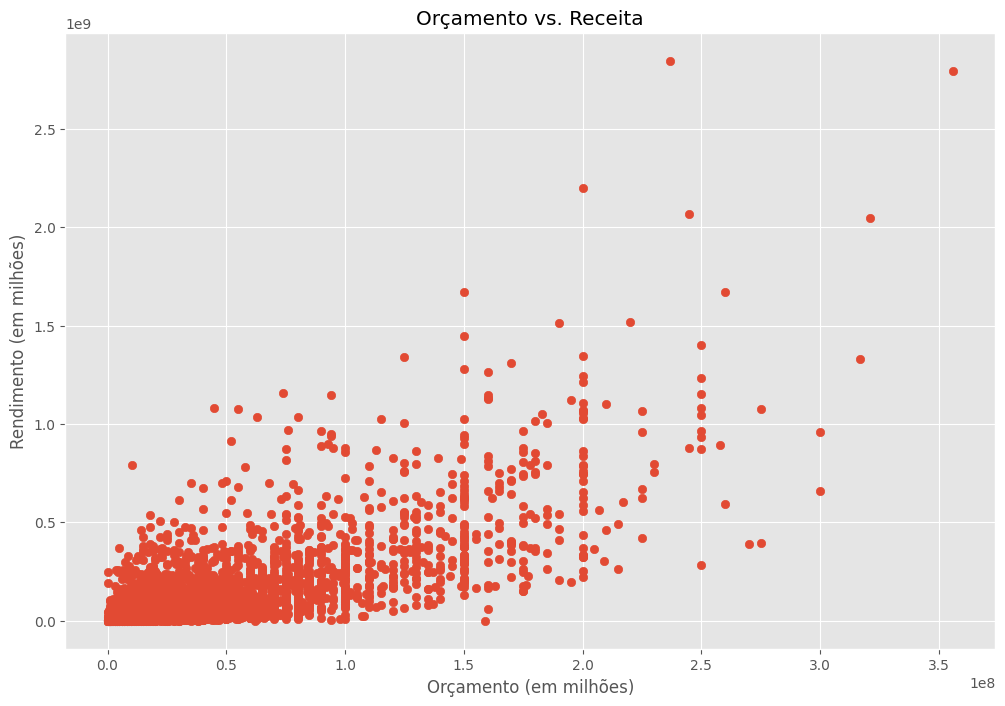

In [ ]:
# SCATTERPLOT: ORÇAMENTO vs RECEITA

# Cria gráfico de dispersão para analisar relação entre budget e gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Orçamento vs. Receita')
plt.xlabel('Orçamento (em milhões)')
plt.ylabel('Rendimento (em milhões)')

plt.show()


In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


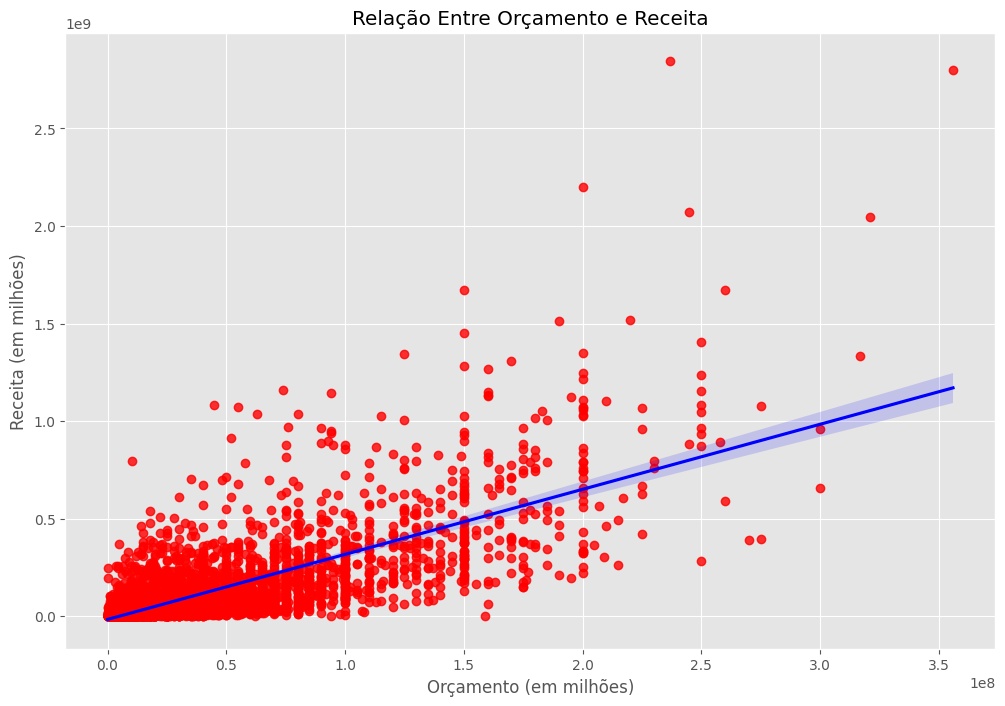

In [ ]:
# REGRESSÃO: BUDGET vs GROSS


# Cria gráfico com linha de regressão
sns.regplot(
    x='budget',
    y='gross',
    data=df,
    scatter_kws={'color': 'red'},   # cor dos pontos
    line_kws={'color': 'blue'}      # cor da linha de tendência
)

plt.title('Relação Entre Orçamento e Receita')
plt.xlabel('Orçamento (em milhões)')
plt.ylabel('Receita (em milhões)')

plt.show()


In [ ]:
# MATRIZ DE CORRELAÇÃO (VARIÁVEIS NUMÉRICAS)

# Calcula a correlação apenas entre colunas numéricas
correlation_matrix = df.corr(numeric_only=True)

# Exibe a matriz de correlação
correlation_matrix


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [14]:
# Alta correlação entre orçamento e receita 

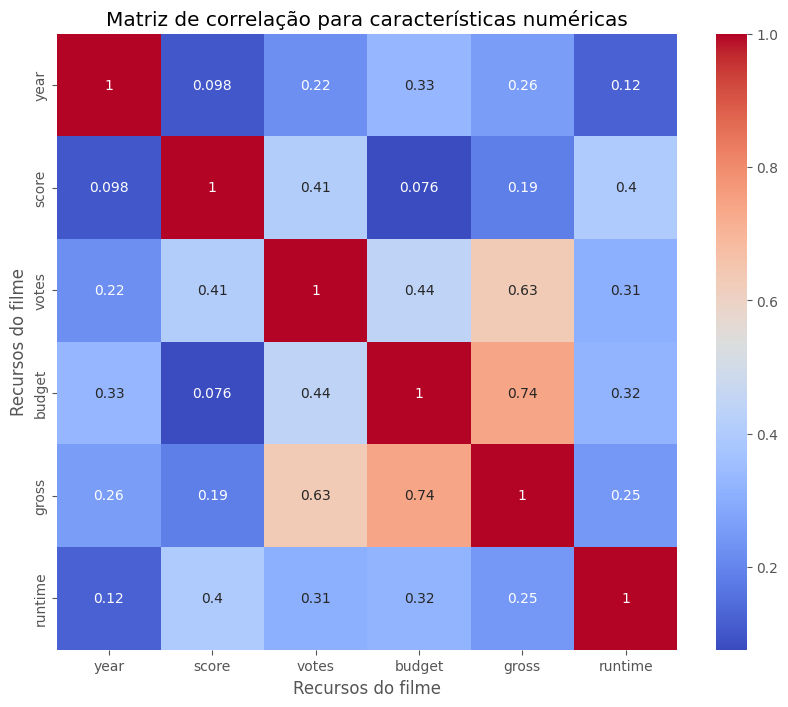

In [ ]:
# MATRIZ DE CORRELAÇÃO (PEARSON)

# Calcula a correlação utilizando o método de Pearson
correlation_matrix = df.corr(method='pearson', numeric_only=True)

# Cria o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))

sns.heatmap(
    correlation_matrix,
    annot=True,        # Mostra os valores dentro dos quadrados
    cmap='coolwarm'    # Mapa de cores (azul = negativo, vermelho = positivo)
)

plt.title('Matriz de correlação para características numéricas')
plt.xlabel('Recursos do filme')
plt.ylabel('Recursos do filme')

plt.show()


In [ ]:
# CONVERSÃO DE VARIÁVEIS CATEGÓRICAS EM CÓDIGOS NUMÉRICOS

# ATENÇÃO:
# df_numerized = df NÃO cria uma cópia independente.
# Ele apenas cria uma nova referência para o mesmo DataFrame.
# Para evitar alterar o original, o ideal é usar .copy()

df_numerized = df.copy()

# Percorre todas as colunas do DataFrame
for coluna in df_numerized.columns:
    
    # Verifica se o tipo da coluna é objeto (texto)
    if df_numerized[coluna].dtype == 'object':
        
        # Converte para categoria
        df_numerized[coluna] = df_numerized[coluna].astype('category')
        
        # Converte categorias para códigos numéricos
        df_numerized[coluna] = df_numerized[coluna].cat.codes


# Visualiza as primeiras linhas
df_numerized.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,10
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,8
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,10
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,10
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,8


In [ ]:
# CORRELAÇÃO EM FORMATO DE PARES

# Calcula a matriz de correlação para o DataFrame numerizado
correlation_mat = df_numerized.corr(numeric_only=True)

# Converte a matriz de correlação em pares (formato longo)
corr_pairs = correlation_mat.unstack()

# Exibe os pares de correlação
corr_pairs


name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
                              ...   
yearcorrect  budget         0.015682
             gross          0.002946
             company       -0.010726
             runtime        0.000410
             yearcorrect    1.000000
Length: 256, dtype: float64

In [ ]:
# CORRELAÇÃO EM FORMATO DE PARES

# Calcula a matriz de correlação para o DataFrame numerizado
correlation_mat = df_numerized.corr(numeric_only=True)

# Converte a matriz de correlação em pares (formato longo)
corr_pairs = correlation_mat.unstack()

# Exibe os pares de correlação
corr_pairs


name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
                              ...   
yearcorrect  budget         0.015682
             gross          0.002946
             company       -0.010726
             runtime        0.000410
             yearcorrect    1.000000
Length: 256, dtype: float64

In [19]:
# Votos e orçamento têm a maior correlação com o lucro bruto

# Empresa tem baixa correlação